# Regularization

## Introductory Theory
<p>Regularization is a technique for reducing the complexity of a model in supervised learning. The processing of performing regularization can be viewed with multiple interpretations:<br><br>

<b><u>Complexity Penalty</u></b><br><br>

In the ERM framework, regularization can be viewed as the penalty or cost for adding extra complexity to a model. Often, the complexity is a function of the weights learned for each feature. For now, we'll consider the class of linear models: $f(X) = W\cdot X+t$. Remember in ERM we seek a function $f^{opt}$ such that:<br><br>
<center>$f^{opt}= \underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)$</center><br>

where $\mathbb{L}(f(x),y)$ is some arbitrary loss-function. The complexity of linear functions $f$ is set by the $L^p$-norm of the vector $W$, which is defined as $\|W\|_p =(|W_1|^p+|W_2|^p \dots |W_m|^p)^{\frac{1}{p}}$. The two norms we'll deal with the most in this class are $\|W\|_1$ and $\|W\|_2$. We want to add a term to the loss function that penalizes it as the norm of $W$ increases. We do this by adding a constraint to the above function:<br><br>

<center>$f^{opt}= \underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)$</center>
<center>subject to $R(W)\leq t$</center><br><br>

where $R(W)$ can be any $L^p$-norm (mostly we'll choose $\|W\|_1$ or $\|W\|_2$). Using the method of Lagrange multipliers, we can set this up as:<br><br>

<center>$f^{opt}= \underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)+\lambda (R(W)-t)=\underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)+\lambda R(W)$</center><br><br>
The parameter $\lambda$ is the Lagrange multiplier here, and in most cases we choose it using some form of cross-validation or model selection. We can think of it as a lever that controls the amount of penalty we enforce as $R(W)$ increases. The most commonly used forms of regularization are:<br><br>

<center>$f^{opt}= \underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)+\lambda \sum\limits_{j=1}^m |W_j|$</center><br><br>
<center>$f^{opt}= \underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)+\lambda \sum\limits_{j=1}^m W_j^2$</center><br><br>

The first one above is commonly called "$L1$" regularization or the "lasso." The second is usually called "$L2$" or "ridge." Both can be thought of as penalties that force the optimal solution into a bounded region, where the bound is defined by some sort of $L^p$ circle with radius $t$. <br><br>

<b><u>Bayesian Formulation</u></b><br><br>

Regularization also has a very nice Bayesian interpretation, which we will develop here. Regularization can be thought of as a Maxium a Posteriori estimation problem, which is an extension of Maximum Likelihood estimation. If you recall, we used the MLE method to find optimal parameters for Logistic Regression. This was defined as:<br><br>
<center>$\hat{\beta}_{MLE} =\underset{\beta} {\mathrm{argmin}} \:L(\beta|X,Y)=\underset{\beta} {\mathrm{argmin}} \:\prod\limits_{i=1}^nP(x_i,y_i|\beta)=\underset{\beta} {\mathrm{argmin}} \:\prod\limits_{i=1}^np_i^{y_i}(1-p_i)^{1-y_i}$</center><br><br>

In MAP estimation, we assert a prior belief onto the value of $\beta$, so instead of finding $\beta$ that optimizes the likelihood, we find one that optimizes the posterior distribution, which is defined as:<br><br>

<center>$P(\beta|X,Y) = \frac{P(X,Y|\beta)*P(\beta)}{P(X,Y)}$</center><br><br>
Usually with MAP, the denominator above doesn't factor into the optimization, so we only consider:<br><br>
<center>$P(\beta|X,Y) \propto P(X,Y|\beta)*P(\beta)=Likelihood*Prior$</center><br><br>
For logistic regression, we have already defined the likelihood. Now we can define a prior on $\beta$. For reasons of mostly mathematical convenience, we can assume that $\beta$ comes from one of two priors:<br><br>
<center>$P(\beta_j) = N(0,\tau_j)=\frac{1}{\sqrt{2\pi \tau_j}}exp(\frac{-\beta_j^2}{2\tau_j}),\: \:j=1,2,\dots d$</center><br>
or
<center>$P(\beta_j) = \frac{\lambda_j}{2}exp(-\lambda_j|\beta_j|), \: \:j=1,2,\dots d$</center><br><br>

The first above is the normal distribution, and the second is the Laplace distribution. Again, there might be no reason to assume one prior is better (or more accurate) than the other. We normally choose based on properties of the MAP, given a specific prior. Also, we defined the above priors as functions of individual parameters $\beta_j$. We usually assume that the prior on each $\beta_j$ is independent, so that $P(\beta)=\prod\limits_{i=1}^d P(\beta_j)$. We can now define a new optimization task, based on the MAP formulation:<br><br>

<center>$\hat{\beta}_{MAP} =\underset{\beta} {\mathrm{argmax}} \:L(\beta|X,Y)\:P(\beta)$</center><br><br>
Using the above priors, we can define two different MAP estimators.<br><br>


<center>$\hat{\beta}_{MAP}=\underset{\beta} {\mathrm{argmax}} \prod\limits_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i} \: \prod\limits_{j=1}^d \frac{1}{\sqrt{2\pi \tau_j}} exp(\frac{-\beta_j^2}{2\tau_j})$</center><br>
or
<center>$\hat{\beta}_{MAP}=\underset{\beta} {\mathrm{argmax}} \prod\limits_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i} \: \prod\limits_{j=1}^d \frac{\lambda_j}{2}exp(-\lambda_j|\beta_j|)$</center><br><br>

We don't try to optimize these functions as is. Instead we take the log, and in doing so, we end up with equivalent formulation of $L1$ and $L2$ regularization defined above.

</p>

## Examples

<p>As a starting point, we can visualize how regularization constrains our search space for possible optimum values of $\beta$. We'll generate a high variance data set that represents a bournoulli process where $P(Y|X)$ is governed by the inverse logit. We'll then plot the following:
<ul>
    <li>Contour plot of the log-likelihood loss as a function of $\beta$</li>
    <li>Constraint boundaries of the following constraint $|\beta|_p<t$</li>
    <li>The path of $\hat{\beta}_{MAP}$ as we vary regularization strength</li>
</ul>
</p>

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.append("C:/Users/kevin/Documents/GitHub/DS_course/ipython")

import course_utils as bd
from sklearn import linear_model
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import imp
imp.reload(bd)


def RegDemo(n, alpha, beta, regtype):
    #Generate a bivariate X and a bournoulli Y
    data = bd.gen_logistic_dataframe(n, alpha, beta)

    #Create a grid of possible combinations of beta
    dy = 0.1; dx = 0.1 ; b_min = 0; b_max = 2
    b1, b2 = np.mgrid[b_min:b_max:dx, b_min:b_max:dy]

    #Get z
    z = np.array([[ bd.LogLoss(data, [b1[i,j], b2[i,j]], 0) for j in range(b1.shape[0])] for i in range(b2.shape[0])]) 
    z = z[:-1, :-1]

    #Some settings
    levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
    cmap = plt.get_cmap('PiYG')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    #Plot Contour
    fig = plt.figure()
    ax = plt.subplot(111)

    plt.contourf(b1[:-1, :-1] + dx / 2., b2[:-1, :-1] + dy / 2., z, levels=levels, cmap=cmap)
    plt.colorbar()

    #Plot an Lp Constraint, i.e., the Lp norm < k
    cs = [0.5, 1, 1.5, 2, 2.5, 3]
    x_c = np.arange(b_min, b_max, 0.01)
    for c in cs:
        if (regtype==2):
            y_c = np.sqrt(c - x_c**2)
            plt.plot(x_c[~np.isnan(y_c)], y_c[~np.isnan(y_c)], label='L2 norm<{}'.format(c))
        else:
            y_c = c - x_c
            plt.plot(x_c[(y_c>0)], y_c[(y_c>0)], label='L1 norm<{}'.format(c))


    #Now get optimums for various regularization strengths
    b1_opt = []
    b2_opt = []
    for i in range(-10, 10):
        LR = linear_model.LogisticRegression(C=10**i)
        LR.fit(data.drop('Y', 1), data['Y'])
    
    #Now fit the data for various regularization strengths
    b1_opt = []
    b2_opt = []
    for i in range(-60, 60):
        LR = linear_model.LogisticRegression(C=10**i, penalty='l{}'.format(regtype))
        LR.fit(data.drop('Y', 1), data['Y'])
        b1_c, b2_c = LR.coef_[0]    
        b1_opt.append(b1_c)
        b2_opt.append(b2_c)

    plt.plot(b1_opt, b2_opt, 'k+-')
    
    plt.xlim([b_min+dx, b_max-2*dx])
    plt.ylim([b_min+dy, b_max-2*dy])

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height*0.0 , box.width, box.height * 1])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3, prop={'size':10})

    plt.show()


<p>The next two plots show all of the above with different sized datasets. The first is relatively small, with 50 examples, and the 2nd has 50k examples. We know the true value of the data generating distribution is $\beta=[1, 1]$. The dark green elipsoid shows where the log-loss is at a minimum. Its center is the optimum point of the data. With more data, we can see that this center gets closer to $[1, 1]$.<br><br>
The circular constraint boundaries basically say that the coordinates of $\hat{\beta}_{MAP}$ have to be within that boundary. The MAP estimator will found the lowest value of the log-loss (i.e., darker color) within the circle. <br><br>

What we can learn here is that with a very loose regularization weight (bigger circle), we are more likely to choose $\hat{\beta}_{MAP}$ that fits the data well, but is far from the truth (which we know because we created the data generating distribution). With the right regulariztion strength (such as the red circle in the above plot), we can see that our MAP estimate is actually closer to the truth. The problem is less severe with more data, because the dark green elipsoid shifts closer to the true optimum point. <br><br>

Note that with $L1$ regularization, we can do the same analysis, though the constraint boundaries would look different. Instead of circles they would be straight lines.

</p>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt


<Figure size 432x288 with 0 Axes>

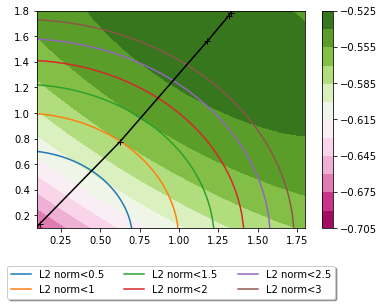

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt


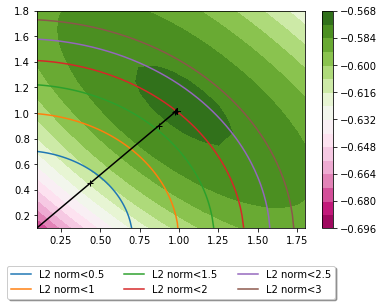

In [2]:
plt.clf()
RegDemo(50, 0, [1, 1], 2)
RegDemo(50000, 0, [1, 1], 2)

<p>The above examples were a bit theoretical, and are mainly presented for explaining the underlying optimization process (and to reinforce the idea of the bias-variance tradeoff going on).<br><br>
Below we'll look at an actual dataset. First we'll read it in and rescale it. Rescaling is very important because the norm of $\beta$ is going to be a function of the scale of each feature. Since we apply the same regularization factor to each feature, rescaling ensures that it has the same effect per feature. 


</p>

In [3]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
imp.reload(bd)

f='../data/ads_dataset_cut.txt'

#Lets prep the data
train_split = 0.75
tdat = pd.read_csv(f,header=0,sep='\t')

'''
For regularization, it is advised to normalize the data first. We'll normalize and then split, and if its not obvious
we shouldn't normalize the outcome.

Note too that the sklearn scale function returns an array, which we have to throw back into a data frame.
'''

lab = 'y_buy'
Y = tdat[lab]
X = tdat.drop(lab, 1)
X_scale = pd.DataFrame(scale(X, axis=0, with_mean=True, with_std=True, copy=True), columns = X.columns.values)

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=42)

#The above returns numpy arrays. I'd prefer to store them as data frames.
X_train = pd.DataFrame(X_train, columns = X.columns.values)   
X_test = pd.DataFrame(X_test, columns = X.columns.values)   
Y_train = pd.Series(Y_train)    
Y_test = pd.Series(Y_test)        


<p>Next, we'll look at how a feature's weight evolves as we change the regularization weight.

</p>

In [4]:
L2 = {}
L1 = {}

for i in np.arange(-5, 5, 0.5):
    LR2 = linear_model.LogisticRegression(C=10**i, penalty = 'l2', solver = 'liblinear')
    LR2.fit(X_train, Y_train)
    L2[i] = LR2.coef_[0]
    LR1 = linear_model.LogisticRegression(C=10**i, penalty = 'l1', solver = 'liblinear')
    LR1.fit(X_train, Y_train)
    L1[i] = LR1.coef_[0]


feats = X.columns.values
Rpath2 = pd.DataFrame(L2, index=feats).transpose()
Rpath1 = pd.DataFrame(L1, index=feats).transpose()

<p> This plot shows how the weights progress with $L2$ regularization. We can see a generally smooth progression that converges to a point as the regularization strength decreases.


</p>

<Figure size 432x288 with 0 Axes>

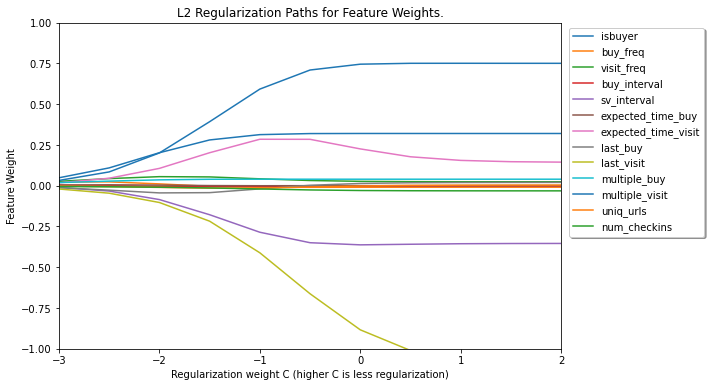

In [5]:
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)

for f in feats:
    plt.plot(Rpath2.index.values, Rpath2[[f]], label=f)

plt.xlim([-3, 2])
plt.ylim([-1, 1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*1.5, box.height * 1.5])

    # Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, shadow=True, ncol=1, prop={'size':10})

plt.title('L2 Regularization Paths for Feature Weights.')
plt.xlabel('Regularization weight C (higher C is less regularization)')
plt.ylabel('Feature Weight')
plt.show()

<p> Next we'll do the same for $L1$.

</p>

<Figure size 432x288 with 0 Axes>

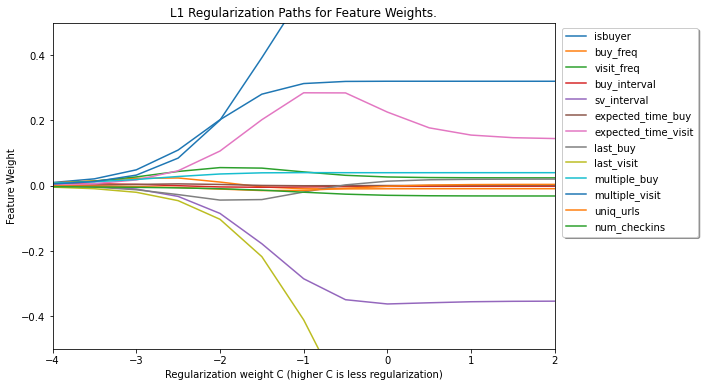

In [6]:
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)

for f in feats:
    plt.plot(Rpath1.index.values, Rpath2[[f]], label=f)

plt.xlim([-4, 2])
plt.ylim([-0.5, 0.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*1.5, box.height * 1.5])

    # Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, shadow=True, ncol=1, prop={'size':10})

plt.title('L1 Regularization Paths for Feature Weights.')
plt.xlabel('Regularization weight C (higher C is less regularization)')
plt.ylabel('Feature Weight')
plt.show()

<p>It is not so obvious from the above plot that $L1$ holds the feature weight at 0 for some time, but we can see this if we directly compare the paths of individual features.


</p>

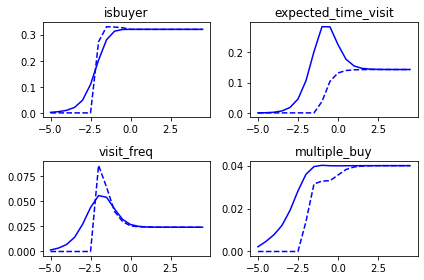

In [7]:

fs = ['isbuyer','expected_time_visit','visit_freq','multiple_buy']

fig = plt.figure()

for i,f in enumerate(fs):
    fig.add_subplot(2, 2, i+1)
    plt.title(f)
    plt.plot(Rpath2.index.values, Rpath2[[f]], 'b', label='L2')
    plt.plot(Rpath1.index.values, Rpath1[[f]], 'b--', label='L1')
    
fig.tight_layout()


plt.show()

<p>Next we want to choose our regularization strength. Remember that from a Bayesian point of view, the regularization strength respresents our prior belief on the variance of the feature weights. If we assume a lower prior variance, we are effectively not allowing the weights to deviate too far from zero. Whether we take this point of view or not, the optimal strength is largely an empirical question. It is generally better to test rather than to assume what the optimal strength should be. <br><br>

The various implementations of learning algorithms differ in how they treat the regularization parameter. Many implementations formulate the loss function as such:<br><br>

<center>$\underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)+\lambda R(W)$
</center><br><br>
In the above, the parameter $\lambda$ controls how much of the loss function is determined by the regularization function. Other implementations view it like this:<br><br>
<center>
$\underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n C*\mathbb{L}(f(x_i),y_i)+R(W)$
</center><br><br>
In the latter formulation the parameter controls how much the training error influences the total loss. It doesn't really matter which of the above is used (one is just a scalar multuple of the other), but it is helpful to know which system your implementation uses. I.e., it is useful to know if increasing the regularization parameter <i>increases</i> or <i>decreases</i> the amount of regularization being done. In SKLearn, the latter formulation is used.<br><br>

Here we take the above example and use cross validation to find an optimal regularization strength.

</p>

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def LRValAUC(X_tr, Y_tr, k, cs):
    '''
    Perform k-fold cross validation on logistic regression, varies C and penalty Type (L1 or L2),
    returns a dictionary where key=c,value=[auc-c1, auc-c2, ...auc-ck].
    '''
    cv = KFold(n_splits=10)
    aucs = {}

    for train_index, test_index in cv.split(X_tr):
        X_tr_f = X_tr.iloc[train_index]
        X_va_f = X_tr.iloc[test_index]
        Y_tr_f = Y_tr.iloc[train_index]
        Y_va_f = Y_tr.iloc[test_index]
        
        for c in cs:
            for norm in [1,2]:
                lr = linear_model.LogisticRegression(C=c, penalty='l{}'.format(norm), solver='liblinear')
                lr.fit(X_tr_f,Y_tr_f)
                met = roc_auc_score(Y_va_f, lr.predict_proba(X_va_f)[:,1])

                if (c, norm) in aucs:
                    aucs[(c, norm)].append(met)
                else:
                    aucs[(c, norm)] = [met]
    
    return aucs

In [9]:
xval_dict = {'e':[], 'mu':[], 'sig':[], 'norm':[]}
k = 10
exps = np.arange(-5,5,0.5)
auc_cv = LRValAUC(X_train, Y_train, k, [10**i for i in exps])
for i in exps:
    for norm in [1, 2]:
        xval_dict['e'].append(i)
        xval_dict['norm'].append(norm)
        xval_dict['mu'].append(np.array(auc_cv[(10**i, norm)]).mean())
        xval_dict['sig'].append(np.sqrt(np.array(auc_cv[(10**i, norm)]).var()))

xvals = pd.DataFrame(xval_dict)
xvals['low'] = xvals['mu']-xvals['sig']/np.sqrt(k)
xvals['up'] = xvals['mu']+xvals['sig']/np.sqrt(k)


<p>Now lets plot the cross-validated error as a function of C, with a separate series for the different penalization types


</p>

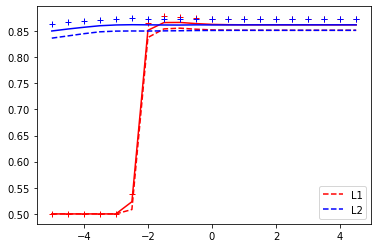

In [10]:
plt.clf()

norm = 1
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['mu'][(xvals['norm']==norm)], 'r')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['low'][(xvals['norm']==norm)], 'r--', label='L1')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['up'][(xvals['norm']==norm)], 'r+')

norm = 2
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['mu'][(xvals['norm']==norm)], 'b')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['low'][(xvals['norm']==norm)], 'b--', label='L2')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['up'][(xvals['norm']==norm)], 'b+')

plt.legend(loc=4)

plt.show()

<p>This is interesting. We can see that the AUC for $L1$ is $0.5$ where the regularization is stronger, but for $L2$ the AUC is pretty good in the same region. This is because all of the feature weights in $L1$ are zero for that range. In $L2$ they'll likely be small, but they won't be zero. This means they'll still be able to rank the instances.
</p>

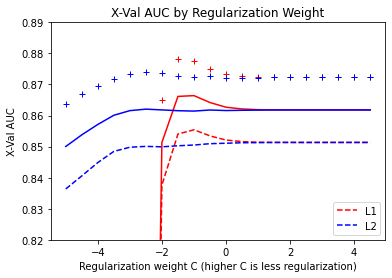

In [11]:
norm = 1
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['mu'][(xvals['norm']==norm)], 'r')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['low'][(xvals['norm']==norm)], 'r--', label='L1')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['up'][(xvals['norm']==norm)], 'r+')

norm = 2
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['mu'][(xvals['norm']==norm)], 'b')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['low'][(xvals['norm']==norm)], 'b--', label='L2')
plt.plot(xvals['e'][(xvals['norm']==norm)], xvals['up'][(xvals['norm']==norm)], 'b+')

plt.legend(loc=4)
plt.ylim([0.82, 0.89])

plt.title('X-Val AUC by Regularization Weight')
plt.xlabel('Regularization weight C (higher C is less regularization)')
plt.ylabel('X-Val AUC')

plt.show()